<a href="https://colab.research.google.com/github/Hersheytha/VAC_SEM4/blob/main/Harshithaa_VAC_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.image as mimg

In [38]:
c0=os.listdir("/content/drive/MyDrive/damon/")
c1=os.listdir("/content/drive/MyDrive/Elijah")

In [39]:
limit=10
c0_images=[None]*limit
j=0
for i in c0:
 if(j<limit):
  c0_images[j]=imread("/content/drive/MyDrive/damon/"+i)
  j+=1
 else:
  break

In [40]:
c1_images=[None]*limit
j=0
for i in c1:
 if(j<limit):
  c1_images[j]=imread("/content/drive/MyDrive/Elijah/"+i)
  j+=1
 else:
  break

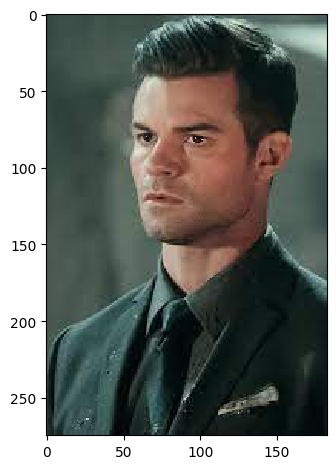

In [41]:
imshow(c0_images[1])
imshow(c1_images[1])

In [42]:
c0_gray=[None]*limit
j=0
for i in c0:
 if(j<limit):
  c0_gray[j]=rgb2gray(c0_images[j])
  j+=1
 else:
  break

In [43]:
c1_gray=[None]*limit
j=0
for i in c1:
 if(j<limit):
  c1_gray[j]=rgb2gray(c1_images[j])
  j+=1
 else:
  break

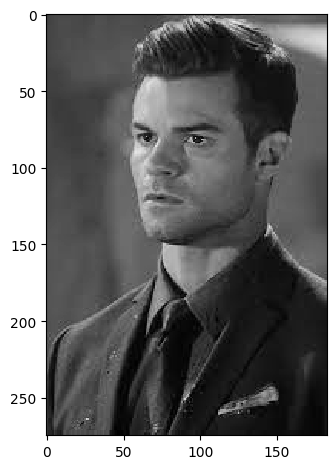

In [44]:
imshow(c0_gray[1])
imshow(c1_gray[1])

In [45]:
for j in range (10):
 _c0 = c0_gray[j]
 c0_gray[j]=resize(_c0,(240,240))

for j in range (10):
 _c1=c1_gray[j]
 c1_gray[j]=resize(_c1,(240,240))

In [46]:
len_of_images_c0=len(c0_gray)
len_of_images_c1=len(c1_gray)

In [47]:
image_size_c0=c0_gray[1].shape
image_size_c1=c1_gray[1].shape

In [48]:
flatten_size_c0=image_size_c0[0]*image_size_c0[1]
flatten_size_c1=image_size_c1[0]*image_size_c1[1]

In [49]:
for i in range(10):
 c0_gray[i]=np.ndarray.flatten(c0_gray[i]).reshape(flatten_size_c0,1)
for i in range(10):
 c1_gray[i]=np.ndarray.flatten(c1_gray[i]).reshape(flatten_size_c1,1)

In [50]:
c0_gray=np.dstack(c0_gray)
c1_gray=np.dstack(c1_gray)

In [51]:
c0_gray=np.rollaxis(c0_gray,axis=2,start=0)
c1_gray=np.rollaxis(c1_gray,axis=2,start=0)

In [52]:
c0_gray=c0_gray.reshape(len_of_images_c0,flatten_size_c0)
c1_gray=c1_gray.reshape(len_of_images_c1,flatten_size_c1)

In [56]:
c0_data=pd.DataFrame(c0_gray)
c1_data=pd.DataFrame(c1_gray)

In [57]:
c0_data["label"]="Damon"
c1_data["label"]="Elijah"

In [58]:
df=pd.concat([c0_data,c1_data])

In [59]:
from sklearn.utils import shuffle
tvd_indexed=shuffle(df).reset_index()
tvd_indexed

,index,0,1,2,3,4,5,6,7,8,...,57591,57592,57593,57594,57595,57596,57597,57598,57599,label
0,3,0.125951,0.125951,0.126237,0.126203,0.123143,0.122423,0.121659,0.120103,0.117162,...,0.076877,0.076877,0.076877,0.075230,0.071590,0.066210,0.056347,0.046932,0.041552,Elijah
1,7,0.348856,0.348856,0.348856,0.348856,0.348856,0.348856,0.348856,0.348856,0.348856,...,0.036300,0.038990,0.039438,0.037717,0.034847,0.034847,0.032605,0.031260,0.031260,Elijah
2,9,0.125951,0.125951,0.126237,0.126203,0.123143,0.122423,0.121659,0.120103,0.117162,...,0.076877,0.076877,0.076877,0.075230,0.071590,0.066210,0.056347,0.046932,0.041552,Elijah
3,1,0.710440,0.710841,0.716148,0.721608,0.724551,0.730122,0.732242,0.732331,0.734187,...,0.071972,0.075281,0.075894,0.075894,0.078209,0.083454,0.083454,0.083454,0.083454,Damon
4,5,1.000000,1.000000,1.000000,1.000000,1.000000,0.999962,0.998073,0.507711,0.034587,...,0.002533,0.499729,0.997527,0.999939,1.000000,1.000000,1.000000,1.000000,1.000000,Damon
5,5,0.177036,0.177036,0.177036,0.177987,0.180755,0.180922,0.181867,0.182513,0.182639,...,0.308412,0.294442,0.292358,0.303167,0.296991,0.287897,0.278633,0.273118,0.273118,Elijah
6,3,0.795432,0.797001,0.798765,0.798765,0.801315,0.804060,0.806633,0.806976,0.808643,...,0.054654,0.057412,0.060500,0.063269,0.067366,0.072458,0.072900,0.074603,0.075975,Damon
7,1,0.255496,0.257555,0.260545,0.263535,0.266526,0.269516,0.274295,0.279418,0.282408,...,0.034715,0.031725,0.028735,0.028147,0.031676,0.040647,0.051946,0.065304,0.075598,Elijah
8,6,1.000000,1.000000,1.000000,1.000000,1.000000,0.999962,0.998073,0.507711,0.034587,...,0.002533,0.499729,0.997527,0.999939,1.000000,1.000000,1.000000,1.000000,1.000000,Damon
9,2,0.177036,0.177036,0.177036,0.177987,0.180755,0.180922,0.181867,0.182513,0.182639,...,0.308412,0.294442,0.292358,0.303167,0.296991,0.287897,0.278633,0.273118,0.273118,Elijah


In [63]:
vam=tvd_indexed.drop(['index'],axis=1)

In [64]:
vam.to_csv("/content/drive/MyDrive/vehicles.csv")

In [68]:
x=vam.values[:,:-1]
y=vam.values[:,-1]

In [65]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
from sklearn import svm

In [70]:
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [71]:

y_pred


array(['Damon', 'Elijah', 'Elijah', 'Damon'], dtype=object)

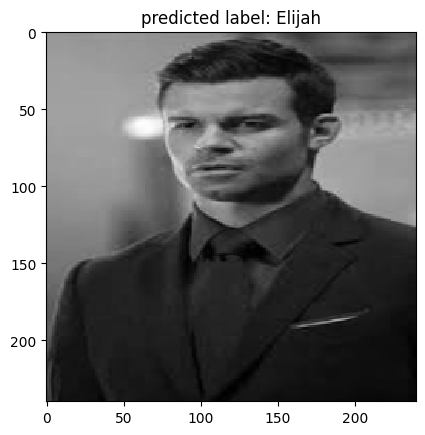

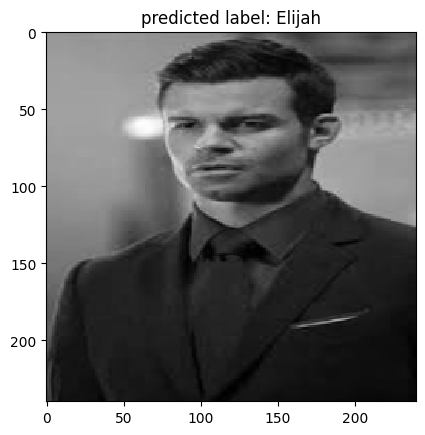

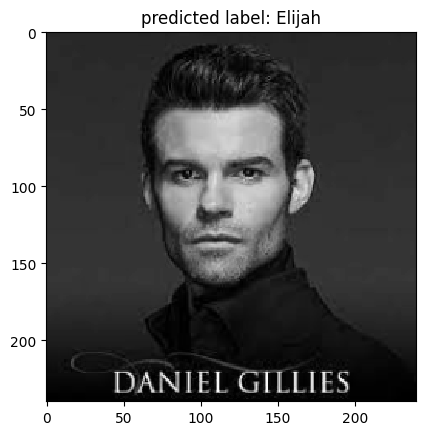

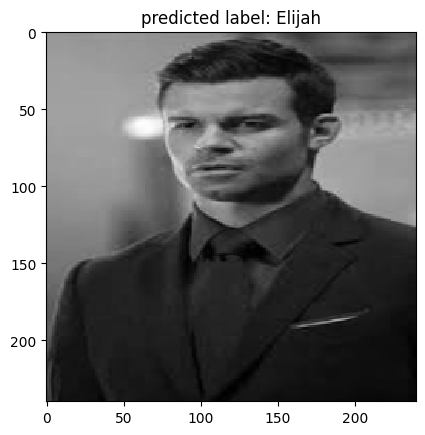

In [73]:

for i in (np.random.randint(1,3,4)):
  predicted_images = (np.reshape(x_test[i], (240,240)).astype(np.float64))
  plt.title('predicted label: {0}'. format(y_pred[i]))
  plt.imshow(predicted_images, interpolation='nearest', cmap='gray')
  plt.show()
